## 1 Preliminaries

## 1.1 Imports and Configurations

### Imports

In [176]:
import os
import re
import shutil
import warnings
import json
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from torchvision.io import read_image

### Constants

In [206]:
RANDOM_STATE = 42

RAW_DIR = '../data/raw/'
FINAL_DIR = '../data/final/'

VQA_PATH = RAW_DIR + 'VQA_train.csv'
ANNOTATIONS_PATH = RAW_DIR + 'abstract_v002_train2017_annotations.json'
QUESTIONS_PATH = RAW_DIR + 'OpenEnded_abstract_v002_train2017_questions.json'
IMG_DIR = RAW_DIR + 'scene_img_abstract_v002_train2017/'

IMG_FINAL_DIR = '../data/final/scene_img_abstract_v002_train2017/'

IMG_FORMAT = '.png'

### Configs

In [178]:
warnings.filterwarnings('ignore')

np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

In [179]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 1.2 Fast EDA

In [180]:
vqa = pd.read_csv(VQA_PATH, index_col=0)

with open(ANNOTATIONS_PATH) as f:
    annotations = json.load(f)

with open(QUESTIONS_PATH) as f:
    questions = json.load(f)

### VQA

In [181]:
vqa.head()

,image_id,question,question_id,answer
0,87,Is the boy having wine?,870,yes
1,900000870,Is the boy having wine?,900000870,no
2,14962,Is it night time?,149620,no
3,900149620,Is it night time?,900149620,yes
4,8277,Is the boy hanging from monkey bars?,82771,yes


In [182]:
vqa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22055 entries, 0 to 22054
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_id     22055 non-null  int64 
 1   question     22055 non-null  object
 2   question_id  22055 non-null  int64 
 3   answer       22055 non-null  object
dtypes: int64(2), object(2)
memory usage: 861.5+ KB


In [183]:
print(f'N unique: {vqa["image_id"].nunique()}')
print(f'N Values > 1: {(vqa["image_id"].value_counts() > 1).sum()}')

N unique: 20629
N Values > 1: 1357


In [184]:
print(f'N unique: {vqa["question"].nunique()}')
print(f'N Values > 1: {(vqa["question"].value_counts() > 1).sum()}')

N unique: 9471
N Values > 1: 8394


In [185]:
print(f'N unique: {vqa["question_id"].nunique()}')
print(f'N Values > 1: {(vqa["question_id"].value_counts() > 1).sum()}')

N unique: 22055
N Values > 1: 0


In [186]:
print(f'N unique: {vqa["answer"].nunique()}')
print(f'N Values > 1: {(vqa["answer"].value_counts() > 1).sum()}')

N unique: 2
N Values > 1: 2


### Annotations

In [189]:
annotations['annotations'][12]

{'question_type': 'is the boy',
 'multiple_choice_answer': 'yes',
 'answers': [{'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 1},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'no', 'answer_confidence': 'maybe', 'answer_id': 3},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 7},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 16397,
 'answer_type': 'yes/no',
 'question_id': 163971}

### Questions

In [190]:
questions['questions'][12]

{'image_id': 16397,
 'question': 'Is the boy waving to the girl?',
 'question_id': 163971}

### Images

In [198]:
def show_img(img_dir, img_name, img_id):
    img = mpimg.imread(os.path.join(img_dir, img_name))
    question, answer = vqa.loc[vqa['image_id'] == img_id, ['question', 'answer']].values[0]
    
    plt.title(f'{question} - {answer}')
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    print(f'Image shape: {img.shape}')

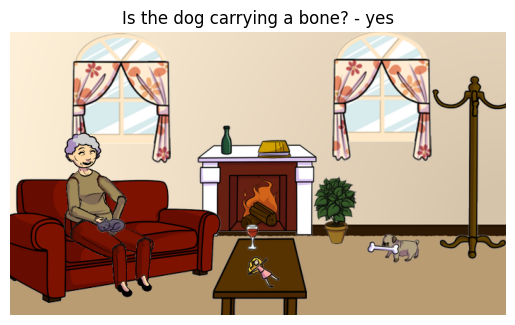

Image shape: (400, 700, 4)


In [199]:
show_img(IMG_DIR, 'abstract_v002_train2015_000000000398.png', 398)

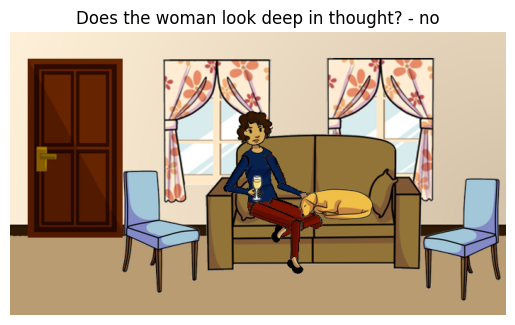

Image shape: (400, 700, 4)


In [201]:
show_img(IMG_DIR, 'abstract_v002_train2015_000900172021.png', 900172021)

## 1.2 Data Preprocessing